In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob

## Data Processesing

In [13]:
path = 'data/processed_data/labeled_data/*.csv'

frames = []

# Process each file in chunks
for fname in glob.glob(path):
    
    chunks = pd.read_csv(fname, chunksize=500000)  
    for chunk in chunks:
        frames.append(chunk)

all_data = pd.concat(frames)

print("Data successfully loaded in chunks.")


/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/3692774092.py:9: DtypeWarning: Columns (35,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/3692774092.py:9: DtypeWarning: Columns (35,39,49) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/3692774092.py:9: DtypeWarning: Columns (35,45) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/3692774092.py:9: DtypeWarning: Columns (33,35,37,39,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/3692774092.py:9: DtypeWarning: Columns (35,37,39,45) have mixed types. Specify dt

Data successfully loaded in chunks.


In [14]:
all_data.head()

,Unnamed: 0,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,...,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator,loan_approval
0,10,2014,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,...,NaN,906553.0,4573.0,96.330002,68900.0,75.239998,214.0,400.0,0.0,0.0
1,13,2014,7811300008,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,...,NaN,23120.0,4057.0,66.209999,68900.0,140.399994,642.0,769.0,0.0,1.0
2,18,2014,20-1436988,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,...,NaN,970.0,3427.0,20.430000,68900.0,91.199997,719.0,959.0,0.0,1.0
3,19,2014,7573700002,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,...,NaN,90.0,2643.0,98.180000,68900.0,81.639999,379.0,898.0,0.0,1.0
4,21,2014,0000480228,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,...,NaN,108858.0,2447.0,17.740000,68900.0,254.059998,419.0,242.0,0.0,1.0


In [15]:
print(all_data.shape)
print(all_data.columns)

(462487, 80)
Index(['Unnamed: 0', 'as_of_year', 'respondent_id', 'agency_name',
       'agency_abbr', 'agency_code', 'loan_type_name', 'loan_type',
       'property_type_name', 'property_type', 'loan_purpose_name',
       'loan_purpose', 'owner_occupancy_name', 'owner_occupancy',
       'loan_amount_000s', 'preapproval_name', 'preapproval',
       'action_taken_name', 'action_taken', 'msamd_name', 'msamd',
       'state_name', 'state_abbr', 'state_code', 'county_name', 'county_code',
       'census_tract_number', 'applicant_ethnicity_name',
       'applicant_ethnicity', 'co_applicant_ethnicity_name',
       'co_applicant_ethnicity', 'applicant_race_name_1', 'applicant_race_1',
       'applicant_race_name_2', 'applicant_race_2', 'applicant_race_name_3',
       'applicant_race_3', 'applicant_race_name_4', 'applicant_race_4',
       'applicant_race_name_5', 'applicant_race_5', 'co_applicant_race_name_1',
       'co_applicant_race_1', 'co_applicant_race_name_2',
       'co_applicant_race_2

## Race and Ethnicity Breakdown

In [16]:
all_data['applicant_ethnicity_name'].value_counts()

applicant_ethnicity_name
Not Hispanic or Latino                                                               317663
Not applicable                                                                        57394
Information not provided by applicant in mail, Internet, or telephone application     51468
Hispanic or Latino                                                                    35962
Name: count, dtype: int64

In [17]:
all_data['applicant_race_name_1'].value_counts()

applicant_race_name_1
White                                                                                206234
Asian                                                                                 96512
Not applicable                                                                        57307
Information not provided by applicant in mail, Internet, or telephone application     54196
Black or African American                                                             44929
Native Hawaiian or Other Pacific Islander                                              2071
American Indian or Alaska Native                                                       1238
Name: count, dtype: int64

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/777484714.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


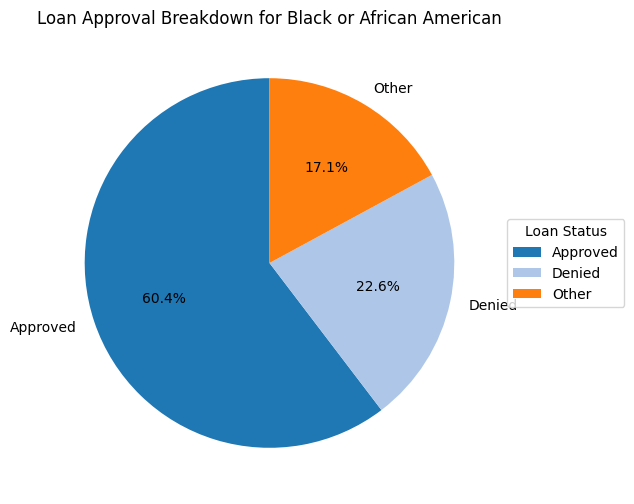

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/777484714.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


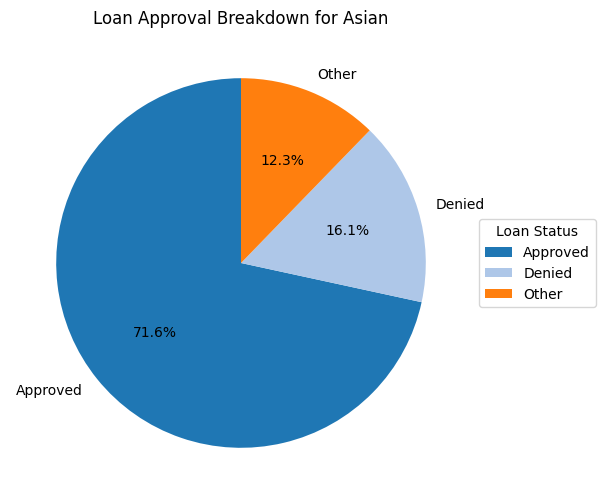

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/777484714.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


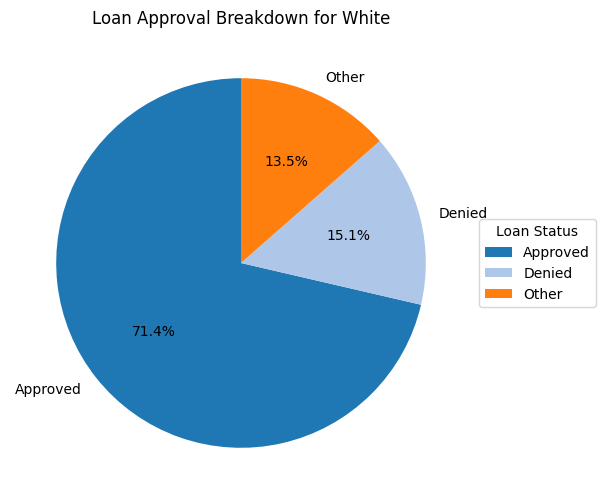

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/777484714.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


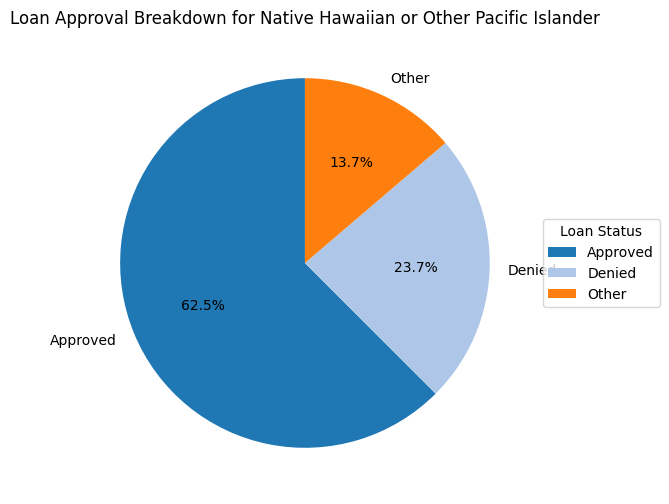

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/777484714.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


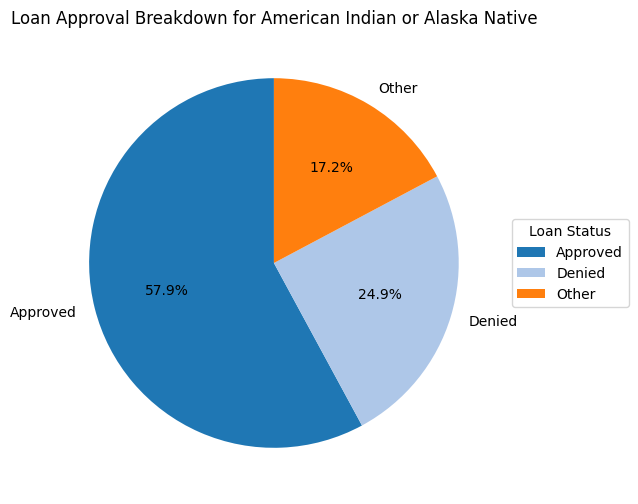

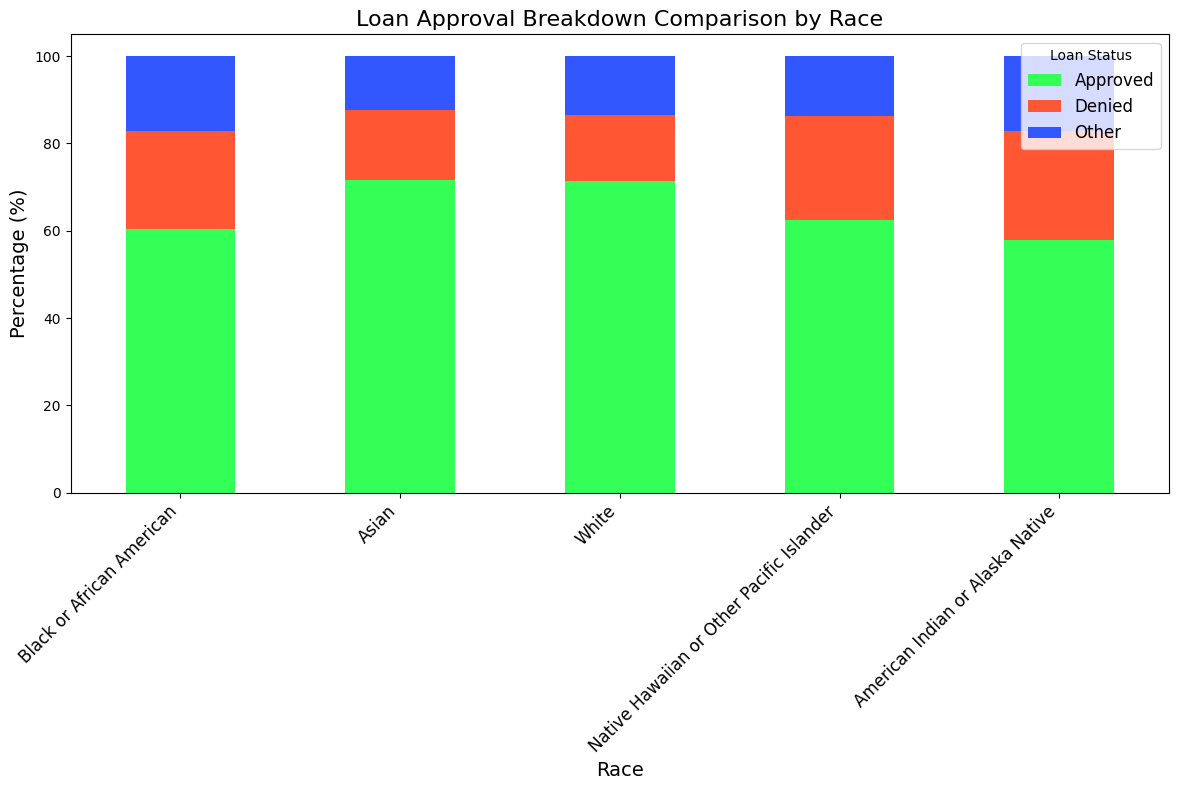

In [18]:
# Breakdown by Race
approval_labels = {0: 'Denied', 1: 'Approved', 2: 'Other'}

# Dictionary to store all races and their approval counts
race_approval_dict = {}

for race in all_data['applicant_race_name_1'].unique():
    if race in ['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable']: 
        continue
    race_data = all_data[all_data['applicant_race_name_1'] == race]
    race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)
    approval_counts = race_data['loan_approval_label'].value_counts(normalize=True) * 100

    race_approval_dict[race] = approval_counts

    # Generate pie chart for the current race
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        approval_counts, 
        labels=approval_counts.index,  # Use the mapped labels for display
        autopct='%1.1f%%', 
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"Loan Approval Breakdown for {race}")
    plt.legend(wedges, approval_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

race_approval_df = pd.DataFrame(race_approval_dict).fillna(0).transpose()

# Plot a bar chart comparing all races
approval_colors = ["#33FF57", "#FF5733", "#3357FF"] 
race_approval_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=approval_colors)

plt.title("Loan Approval Breakdown Comparison by Race", fontsize=16)
plt.xlabel("Race", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Loan Status", fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/3526864576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)


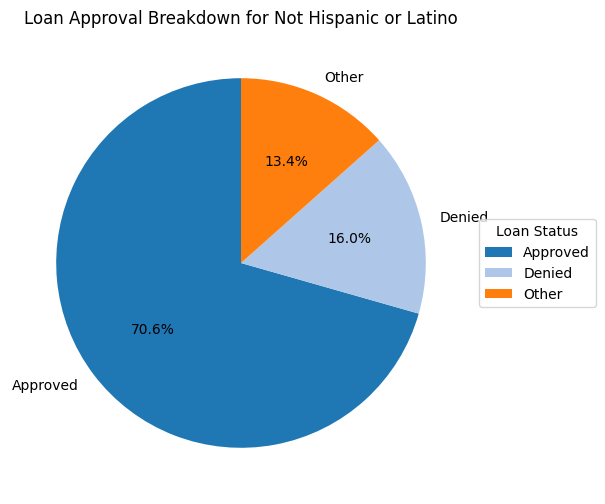

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_20882/3526864576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)


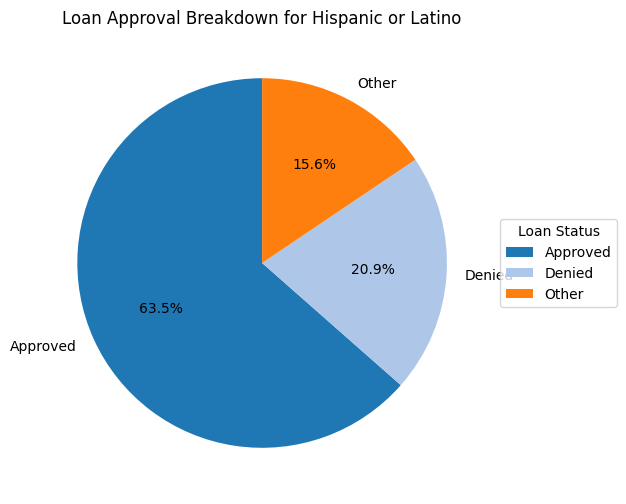

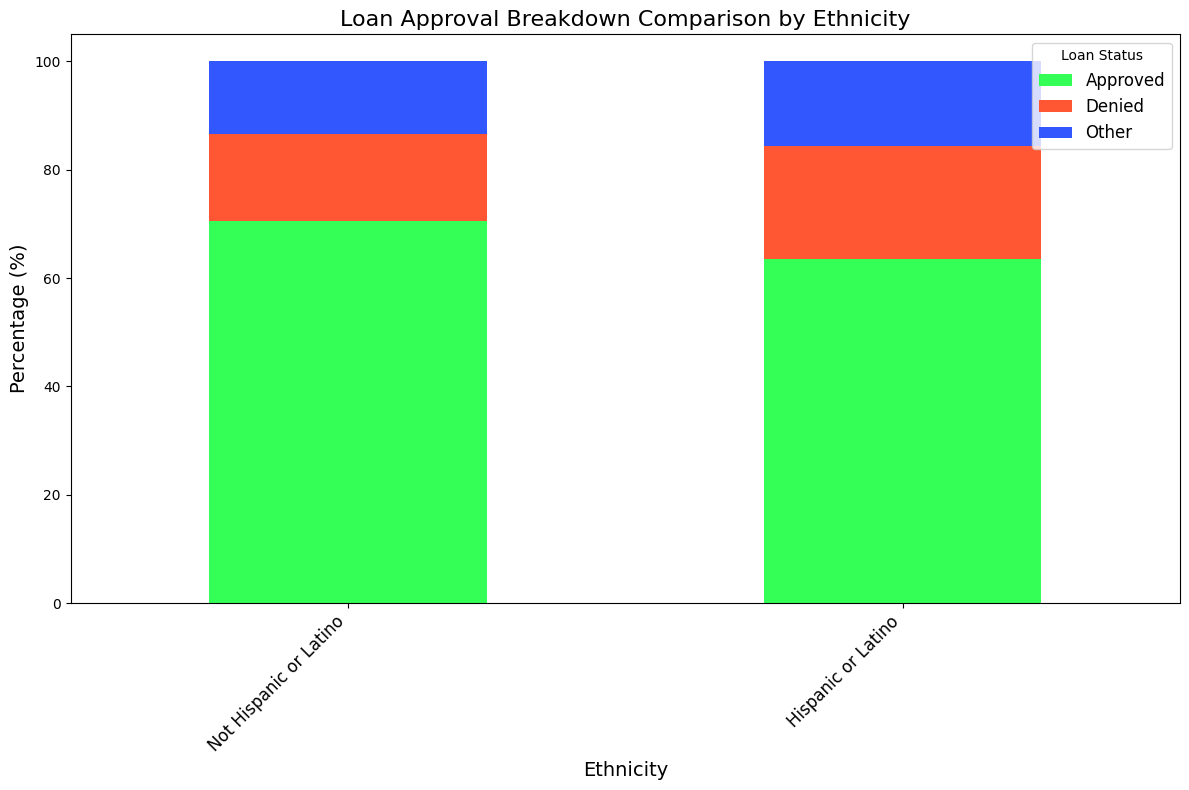

In [19]:
# Ethnicity Breakdown
approval_labels = {0: 'Denied', 1: 'Approved', 2: 'Other'}

# Dictionary to store all ethnicities and their approval counts
ethnicity_approval_dict = {}

for eth in all_data['applicant_ethnicity_name'].unique():
    if eth in ['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable']:
        continue
    eth_data = all_data[all_data['applicant_ethnicity_name'] == eth]
    eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)
    approval_counts = eth_data['loan_approval_label'].value_counts(normalize=True) * 100

    # Add approval counts to the dictionary
    ethnicity_approval_dict[eth] = approval_counts

    # Generate pie chart for the current ethnicity
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        approval_counts,
        labels=approval_counts.index,  # Use the mapped labels for display
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"Loan Approval Breakdown for {eth}")
    plt.legend(wedges, approval_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

ethnicity_approval_df = pd.DataFrame(ethnicity_approval_dict).fillna(0).transpose()

# Plot a bar chart comparing all ethnicities
approval_colors = ["#33FF57", "#FF5733", "#3357FF"] 
ethnicity_approval_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=approval_colors)

plt.title("Loan Approval Breakdown Comparison by Ethnicity", fontsize=16)
plt.xlabel("Ethnicity", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Loan Status", fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()

## Co-Variance Breakdown

In [20]:
# Updated code to calculate and display high covariance without ace_tools

if 'loan_approval' in all_data.columns:

    # Select only numerical columns (not sure if we need to do some preprocessing and change data into)
    numerical_cols = all_data.select_dtypes(include=['float64', 'int64']).columns
    covariances = {}

    for col in numerical_cols:
        if col != 'loan_approval':  
            cov = all_data['loan_approval'].cov(all_data[col])
            covariances[col] = cov

    sorted_covariances = sorted(covariances.items(), key=lambda x: abs(x[1]), reverse=True)

    high_cov_df = pd.DataFrame(sorted_covariances, columns=['Column', 'Covariance'])
    high_cov_df = high_cov_df[(high_cov_df['Covariance'] != 0) & (~high_cov_df['Covariance'].isna())]
  

    print("High Covariance with Loan Approval:")
    print(high_cov_df)

High Covariance with Loan Approval:
                            Column   Covariance
0                  sequence_number -3307.415991
1                       Unnamed: 0   380.580872
2         hud_median_family_income    78.008955
3                 loan_amount_000s    19.585206
4            applicant_income_000s    13.398673
5                       population    11.678526
6    number_of_1_to_4_family_units    -7.526405
7              census_tract_number    -5.010026
8   number_of_owner_occupied_units     4.723293
9            tract_to_msamd_income     2.426888
10             minority_population    -0.601472
11                           msamd    -0.399361
12                applicant_race_4    -0.250000
13             co_applicant_race_3     0.205026
14                    action_taken     0.154239
15                applicant_race_5    -0.096154
16             co_applicant_race_2     0.079269
17                applicant_race_3     0.068647
18                      as_of_year     0.064369
19  

In [21]:
# Correlations instead of covariances as recommended

if 'loan_approval' in all_data.columns:

    # Select only numerical columns
    numerical_cols = all_data.select_dtypes(include=['float64', 'int64']).columns
    correlations = {}

    for col in numerical_cols:
        if col != 'loan_approval':
            corr = all_data['loan_approval'].corr(all_data[col])
            correlations[col] = corr

    sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

    high_corr_df = pd.DataFrame(sorted_correlations, columns=['Column', 'Correlation'])
    high_corr_df = high_corr_df[(high_corr_df['Correlation'] != 0) & (~high_corr_df['Correlation'].isna())]

    print("High Correlation with Loan Approval:")
    print(high_corr_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


High Correlation with Loan Approval:
                            Column  Correlation
3                 applicant_race_5    -0.503367
4                 applicant_race_4    -0.328541
5              co_applicant_race_3     0.287510
6                     action_taken     0.224735
7              co_applicant_race_2     0.104569
8                 applicant_race_3     0.071429
9                       as_of_year     0.050482
10                     preapproval    -0.049865
11                           msamd    -0.048187
14           applicant_income_000s     0.048191
20           tract_to_msamd_income     0.055185
21        hud_median_family_income     0.049290
22                applicant_race_2     0.046920
23                loan_amount_000s     0.045623
24             minority_population    -0.035061
25                applicant_race_1     0.028836
26             applicant_ethnicity     0.027377
27                     lien_status    -0.025251
28             census_tract_number    -0.024916
29 